In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import neighbors, datasets, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import matplotlib
#matplotlib.use('GTKAgg')
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

pip install xlrd==1.2.0.  (latest version of xlrd only imports .xls 

In [2]:
#df = pd.read_excel ('Black-Box-Optimization/Data/number_of_parameters_2.xlsx')
                  

The KNN classifier works on assigning the probability membership in a specifc class based on the distance to other members in a class.

The KNN algorithm randomly takes 80% of the data for training (X_train) and 20% of the data for testing (X_test). Inorder to make the randomization cosistent every time the model is run, a seed of 14 is chosen. 

After fitting the data into the algorithm, the model predicts the assigned_class of the optimzer inroder to help the user chose the type of optimzer they want to utilize for theor specific needs. i.e type of function, number of parametrs, accuracy and time per trial. 

In [22]:
df = pd.read_excel ('black_box_optimization/data/All Data combined.xlsx')

<ipython-input-22-0f7250f109e7>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df = pd.read_excel ('black_box_optimization/data/All Data combined.xlsx')


In [ ]:
print(len(df))
print(df.())

In [24]:
X = df[['number of trials','accuracy [calc. max/ actual max]','time per trial [s]']]
y = df['assigned_class']

print(len(y))

1681


In [25]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14) #14 is seed

print(len(y_train), len(y_test))

1344 337


In [26]:
X_test

,number of trials,accuracy [calc. max/ actual max],time per trial [s]
1624,20,0.180000,0.007000
757,11,0.003907,0.009995
170,16,0.880279,0.013431
1673,17,1.000000,0.034000
938,12,1.000000,0.031895
...,...,...,...
881,5,0.005744,0.005967
451,9,0.108265,0.008396
478,6,0.039597,0.009080
76,13,0.974653,0.007832


since the data in each dimension of X should be scaled similarly for the model, the below code rescales the features. This minimizes the the bias in which dimensioanlity can drastically favor closseness in arbitary dimensions of X.

In [27]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
X_test

array([[ 1.78947807, -1.00859789, -0.40950002],
       [-0.11125312, -1.47178533, -0.39847476],
       [ 0.94470866,  0.8333896 , -0.38582343],
       ...,
       [-1.16721489, -1.37791005, -0.4018422 ],
       [ 0.31113159,  1.08162833, -0.40643562],
       [-0.74483018,  1.14830045,  2.18051826]])

(array([412., 225., 209., 497.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.48206338, -0.7696449 , -0.05722642,  0.65519205,  1.36761053,
         2.08002901,  2.79244748,  3.50486596,  4.21728444,  4.92970291,
         5.64212139]),
 <BarContainer object of 10 artists>)

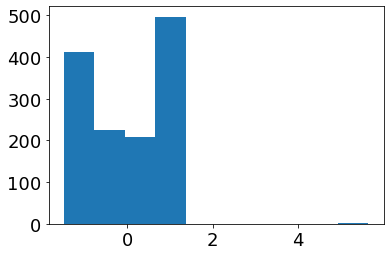

In [29]:
plt.hist(X_train[:,1])

In [30]:
K_neighbors = 2

In [43]:
#Define the model: Init K-NN
# We create an instance of Neighbours Classifier and fit it to the training data.
# if you set weights = 'distance' here you will have a weighted KNN classifier
clf = neighbors.KNeighborsClassifier(K_neighbors, weights='distance')

# Here we fit it to the data - it figures out the assigned_classes and 
# which training X points belong to each class in Y 
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [32]:
print(clf.classes_, clf.effective_metric_, clf.n_samples_fit_)

[0 1 2 3 4 5] euclidean 1344


In [33]:
# Predict the test set results
y_test_predicted = clf.predict(X_test)
y_test_probabilities = clf.predict_proba(X_test)
mean_accuracy = clf.score(X_test, y_test)

print("predicted classes", y_test_predicted)
print("KNN probability of belonging to class",y_test_probabilities)
print("Mean accuracy of prediction", mean_accuracy)


predicted classes [2 0 1 5 3 3 2 3 0 1 2 0 1 0 1 1 4 2 2 2 2 3 2 0 3 1 1 2 3 3 2 0 1 0 3 5 3
 1 2 3 1 3 1 5 2 3 3 2 3 1 3 3 3 0 3 3 3 3 1 0 1 3 3 5 3 3 3 3 0 3 2 3 0 3
 4 0 0 5 3 3 4 2 0 3 2 1 1 3 0 3 0 2 3 0 3 3 5 3 3 0 1 3 3 3 3 3 3 1 3 0 3
 3 3 5 1 0 3 2 0 4 0 2 3 3 3 3 3 2 0 3 1 3 0 5 0 2 1 3 0 0 3 3 3 2 3 1 2 2
 1 1 0 2 3 2 2 3 3 3 0 3 3 3 1 3 3 0 5 1 3 1 0 3 0 0 1 5 3 0 0 1 2 5 3 3 3
 0 4 3 3 1 3 2 0 0 1 3 1 2 3 1 5 2 2 3 3 4 3 1 3 3 3 0 3 3 3 0 0 3 3 0 3 3
 3 3 3 0 3 0 0 3 1 0 3 1 3 0 0 2 0 0 0 3 3 4 1 0 5 1 2 3 0 3 0 0 2 1 2 3 3
 0 0 2 3 0 5 1 0 4 3 3 0 3 2 0 2 3 0 3 0 2 2 1 3 3 0 3 3 3 3 0 0 0 0 2 1 1
 2 2 2 1 0 3 0 0 5 3 0 0 3 2 4 0 3 3 0 3 0 3 3 3 3 3 0 0 1 3 3 3 3 3 3 2 0
 0 0 2 3]
KNN probability of belonging to class [[0.         0.         0.67211039 0.         0.32788961 0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.33895413 0.66104587 0.         0.         0.         0.        ]
 ...
 [1.         0.         0.         0.         0

In [35]:
sklearn.metrics.mean_squared_error(y_test, y_test_predicted)

1.7626112759643917

In [36]:
y_test

1624    4
757     0
170     0
1673    5
938     3
       ..
881     2
451     0
478     0
76      1
1487    3
Name: assigned_class, Length: 337, dtype: int64

In [278]:
y_test_predicted

array([4, 2, 2, 0, 3, 0, 2, 1, 0, 2, 0, 1, 1, 3, 0, 0, 3, 2, 0, 3, 3, 3,
       1, 1, 2, 2, 1, 1, 1, 3, 0, 1, 3, 0, 2, 0, 3, 3, 2, 3, 0, 1, 1, 3,
       3, 0, 0, 0, 1, 0, 3, 1, 3, 3, 3, 0, 3, 4, 0, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 3, 2, 3, 0, 3, 0, 3, 2, 0, 3, 2, 1, 2, 2, 1, 3, 2, 3, 0,
       0, 0, 2, 1, 1, 3, 0, 0, 0, 1, 1, 1, 3, 0, 0, 1, 2, 0, 0, 3, 2, 0,
       1, 3, 3, 2, 3, 3, 2, 2, 0, 1, 0, 3, 4, 0, 2, 0, 3, 1, 1, 1, 2, 0,
       0, 4, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 3, 3, 1, 0, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 3, 1, 3, 2, 2, 3, 1, 2, 2, 1, 4, 1, 1, 0, 2, 0, 2,
       2, 3, 0, 0, 1, 1, 3, 1, 0, 0, 0, 1, 0, 3, 2, 4, 2, 3, 3, 0, 2, 0,
       4, 0, 3, 2, 0, 0, 1, 3, 0, 3, 0, 3, 3, 1, 4, 3, 3, 1, 3, 2, 0, 3,
       2, 1, 0, 2, 3, 0, 0, 1, 0, 2, 3, 4, 3, 1, 2, 0, 0, 2, 0, 0, 2, 3,
       0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 4, 0, 3, 1, 4, 3, 2, 2,
       0, 0, 1, 3, 3, 3])

In [37]:
X_train[:,0]

array([ 0.31113159, -0.95602253, -0.95602253, ..., -0.53363782,
        1.15590101, -1.80079195])

A confusion matrix is a matrix that can be used to measure the performance of a machine learning algorithm. Each row of the matrix represents the instances of an actual assigned_class and each column represents the instances of a predicted class. 

In [45]:
# Evaluate Model
cm = confusion_matrix(y_test, y_test_predicted, labels=[0,1,2,3,4,5])
print(cm)

[[ 33  11  16   8   1   0]
 [ 13  20  12   3   3   0]
 [ 17  10  15   7   2   1]
 [ 11   2   4 118   1   2]
 [  7   2   1   1   0   0]
 [  0   0   0   2   2  12]]


In [52]:
def precision(label, confusion_matrix):
    """Precision is the fraction of cases where the algorith correctly predicted assigned_class 
       out of all instances where the algorithm predicted (correctly and incorrectly)"""
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

def recall(label, confusion_matrix):
    """recall is the fraction of cases where the algorithm correctly predicted out of all of 
       the cases which are labelled as a specific assigned_class"""
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    """calculates the precision for the whole classification problem calculates"""
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    """calculates the recall for the whole classification problem calculates"""
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [53]:
print("label precision recall")
for label in range(6):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")


label precision recall
    0     0.407  0.478
    1     0.444  0.392
    2     0.312  0.288
    3     0.849  0.855
    4     0.000  0.000
    5     0.800  0.750


In [54]:
print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))

precision total: 0.46887878586020076
recall total: 0.4606586224233283


In [55]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm)

0.5875370919881305

Support vector Machine (SVM) algorithm creates a line or a hyperplace which separates the data into classes. 

In [39]:
model = svm.SVC(kernel='linear',C=1000,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)
y_1_test_predicted = model.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, y_1_test_predicted)

1.2522255192878338

In [40]:
model.score(X_test, y_test)

0.7062314540059347

Hyper parameter Tuning 

In [41]:
kernels = ['rbf','linear']
C = [1,10,20,30,40,50,60,70,80,90,100]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'), X, df['type_of_opt'], cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)
        
avg_scores

{'rbf_1': 0.4271548678818709,
 'rbf_10': 0.4515490320757383,
 'rbf_20': 0.45154549950544015,
 'rbf_30': 0.4569008760774339,
 'rbf_40': 0.4563038716970468,
 'rbf_50': 0.45868482407799915,
 'rbf_60': 0.46879504027130137,
 'rbf_70': 0.46998021760633035,
 'rbf_80': 0.47116539494135934,
 'rbf_90': 0.4717571004662992,
 'rbf_100': 0.47473152465734064,
 'linear_1': 0.4432439593047901,
 'linear_10': 0.48548466864490597,
 'linear_20': 0.5033082520842165,
 'linear_30': 0.5151971174226367,
 'linear_40': 0.5169810654232019,
 'linear_50': 0.5276865197117423,
 'linear_60': 0.5288769959022186,
 'linear_70': 0.5366080259997174,
 'linear_80': 0.5449342941924544,
 'linear_90': 0.5455277660025434,
 'linear_100': 0.5574236964815601}

Hyper parameter Tunning with GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20,30,40,50,60,70,80,90,100],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)

clf.fit(X,df['type_of_opt'])
clf.cv_results_

{'mean_fit_time': array([0.09333491, 0.21509671, 0.08875976, 0.59716744, 0.09220662,
        0.92176147, 0.09605985, 1.36453152, 0.09528174, 1.9541306 ,
        0.09634895, 2.090517  , 0.10732465, 2.45498695, 0.09909916,
        2.60280876, 0.10041738, 2.98478642, 0.10394225, 3.32765913,
        0.10503283, 3.47781882]),
 'std_fit_time': array([0.00619256, 0.04575703, 0.00424531, 0.04452247, 0.00518957,
        0.07056341, 0.00922528, 0.19251819, 0.00654095, 0.47484938,
        0.00467168, 0.1612464 , 0.01027786, 0.36396912, 0.00530975,
        0.42489554, 0.00504678, 0.33814348, 0.00648706, 0.46503911,
        0.00685417, 0.21877915]),
 'mean_score_time': array([0.04081864, 0.01143498, 0.03503942, 0.01050954, 0.03457699,
        0.01080799, 0.03457756, 0.01115503, 0.03512816, 0.01040959,
        0.0350194 , 0.01161108, 0.0353054 , 0.0104104 , 0.03352227,
        0.01085644, 0.03345141, 0.01018033, 0.03521748, 0.01136932,
        0.03405848, 0.01026769]),
 'std_score_time': array([0.00

In [60]:
df_1 = pd.DataFrame(clf.cv_results_)
df_1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093335,0.006193,0.040819,0.001758,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.379822,0.392857,0.473214,0.437500,0.452381,0.427155,0.035445,22
1,0.215097,0.045757,0.011435,0.000542,1,linear,"{'C': 1, 'kernel': 'linear'}",0.350148,0.389881,0.523810,0.446429,0.505952,0.443244,0.066254,21
2,0.088760,0.004245,0.035039,0.000566,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.397626,0.434524,0.476190,0.461310,0.488095,0.451549,0.032359,19
3,0.597167,0.044522,0.010510,0.000194,10,linear,"{'C': 10, 'kernel': 'linear'}",0.385757,0.467262,0.565476,0.497024,0.511905,0.485485,0.059174,10
4,0.092207,0.005190,0.034577,0.000896,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.403561,0.443452,0.482143,0.458333,0.470238,0.451545,0.027202,20
5,0.921761,0.070563,0.010808,0.000410,20,linear,"{'C': 20, 'kernel': 'linear'}",0.442136,0.494048,0.580357,0.482143,0.517857,0.503308,0.045659,9
6,0.096060,0.009225,0.034578,0.001147,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.406528,0.452381,0.497024,0.467262,0.461310,0.456901,0.029307,17
7,1.364532,0.192518,0.011155,0.000671,30,linear,"{'C': 30, 'kernel': 'linear'}",0.468843,0.508929,0.577381,0.500000,0.520833,0.515197,0.035546,8
8,0.095282,0.006541,0.035128,0.001473,40,rbf,"{'C': 40, 'kernel': 'rbf'}",0.409496,0.458333,0.497024,0.458333,0.458333,0.456304,0.027790,18
9,1.954131,0.474849,0.010410,0.000468,40,linear,"{'C': 40, 'kernel': 'linear'}",0.471810,0.511905,0.583333,0.491071,0.526786,0.516981,0.038043,7


In [61]:
df_1[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.427155
1,1,linear,0.443244
2,10,rbf,0.451549
3,10,linear,0.485485
4,20,rbf,0.451545
5,20,linear,0.503308
6,30,rbf,0.456901
7,30,linear,0.515197
8,40,rbf,0.456304
9,40,linear,0.516981


In [62]:
clf.best_score_

0.5574236964815601

In [63]:
clf.best_params_

{'C': 100, 'kernel': 'linear'}

Randmized search for hyper parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': np.linspace(0,500,50),
        'kernel':['rbf','linear']
    },
    cv=5, #cross validation
    return_train_score=False,
    n_iter=21
)
rs.fit(X, df['type_of_opt'])
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/saleksegid/miniconda3/lib/python3.8/site-packages/

In [59]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Choosing the best model

In [298]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': np.linspace(0,1000,50),
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [0,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': np.linspace(0,1000,50)
        }
    }
}

In [300]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, df['type_of_opt'])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/saleksegid/miniconda3/lib/python3.8/site-packages/

/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.36592593 0.42296296 0.37259259 0.44740741
 0.38518519 0.46740741 0.38740741 0.48148148 0.39111111 0.49555556
 0.39777778 0.50444444 0.39777778 0.50888889 0.40296296 0.51481481
 0.40518519 0.52074074 0.40518519 0.52296296 0.40444444 0.52666667
 0.40814815 0.53925926 0.41259259 0.53481481 0.4162963  0.53925926
 0.41925926 0.5437037  0.42740741 0.54592593 0.4237037  0.54592593
 0.42518519 0.54444444 0.42814815 0.54666667 0.43037037 0.54074074
 0.43037037 0.54148148 0.43037037 0.54518519 0.43259259 0.54518519
 0.43481481 0.54666667 0.43777778 0.54592593 0.43851852 0.54518519
 0.43925926 0.54518519 0.43851852 0.54592593 0.4362963  0.54518519
 0.43777778 0.54444444 0.43851852 0.54666667 0.43703704 0.54666667
 0.43703704 0.54444444 0.43703704 0.54296296 0.43777778 0.54518519
 0.4362963  0.54518519 0.43703704 0.548

/Users/saleksegid/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.40814815 0.41185185 0.42296296 0.42592593 0.43259259
 0.4362963  0.44       0.44296296 0.44518519 0.44592593 0.44740741
 0.44814815 0.44888889 0.45259259 0.45407407 0.45407407 0.45481481
 0.4562963  0.45703704 0.45851852 0.46148148 0.46296296 0.4637037
 0.46444444 0.46592593 0.46888889 0.47037037 0.47111111 0.47111111
 0.47111111 0.47185185 0.47259259 0.47259259 0.47259259 0.47185185
 0.47185185 0.47407407 0.47407407 0.47555556 0.4762963  0.47555556
 0.47703704 0.47703704 0.47703704 0.47703704 0.47925926 0.47925926
 0.47925926 0.48      ]
  warnings.warn(


In [ ]:
df_2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_2

In [67]:
### abovel showes that svm has the higher score, therefore the better model

In [63]:
models = (svm.SVC(kernel='linear', C=100),
        svm.LinearSVC(C=100, max_iter=100),
         svm.SVC(kernel='rbf', gamma=0.8, C=100),
         svm.SVC(kernel='poly', degree=3, gamma='auto', C=100))

models = (clf.fit(X, y) for clf in models)